In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import math
import os
import cv2

import xml.etree.ElementTree as ET

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import albumentations as album
import segmentation_models_pytorch as smp

In [16]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation, Lambda, Cropping2D, Dropout, BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import GlobalMaxPooling2D

In [13]:
from keras.models import Sequential 
from keras.layers import Activation, Flatten
from keras.layers import Dense, Dropout

Using TensorFlow backend.


In [15]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation, Lambda, Cropping2D, Dropout, BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D

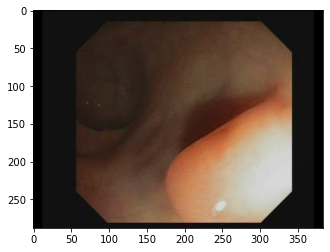

In [2]:
# Display a sample image
img=mpimg.imread('/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/1.jpg')
imgplot = plt.imshow(img)

In [3]:
def read_img(img_path):
    #reading in an image
    image = mpimg.imread(img_path)
    return image

### Save Each Filepath and Filename into List for Each Image

In [4]:
# filepath_list: 
# each element contains a list of two elements
# filepath[0] = filepath, filepath[1] = filename
filepath_list = []
file_annot_list = []
for filename in os.listdir("/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/"):
    if filename.endswith(".jpg"):
        filepath = os.path.join("/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Image/", filename)
        filepath_list.append([filepath, filename])

for file_name in os.listdir("/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Annotation/"):
    if file_name.endswith(".xml"):
        filepath = os.path.join("/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Annotation/", file_name)
        file_annot_list.append([filepath, file_name])


### Read and Save Each Image into Image List

In [5]:
image_list = []
for filepath in filepath_list:
    image = read_img(filepath[0])
    image_list.append(image)

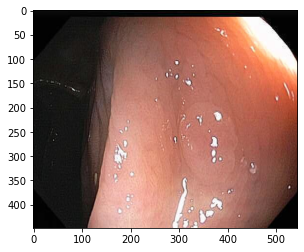

In [6]:
plt.imshow(image_list[0])

### Read and Save Each Annotation into Annotation List

In [7]:
annotation_list = []
for file in file_annot_list:
    annot = file[0]
    annotation_list.append(annot)

In [8]:
(annotation_list)

['/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Annotation/5848.xml',
 '/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Annotation/21665.xml',
 '/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Annotation/5690.xml',
 '/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Annotation/27214.xml',
 '/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Annotation/28127.xml',
 '/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Annotation/162.xml',
 '/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Annotation/23072.xml',
 '/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Annotation/6399.xml',
 '/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Annotation/7087.xml',
 '/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Annotation/14806.xml',
 '/Users/shreyahunur/Desktop/257/Final Project/PolypsSet/train2019/Annotation/25403.xml',
 '/Users/shreyah

In [9]:
# Finding the specific annotation in the xml file
a_list = []
for i in range(28773):
    tree = ET.parse(annotation_list[i])
    root = tree.getroot()
    object = root.find("object")
    if(object):
        polyp_name = object.find("name").text
        a_list.append(polyp_name)
    else:
        a_list.append("Not Specified")

In [10]:
# Finding the unique elements in the list
x = np.array(a_list)
print(np.unique(x))

['Not Specified' 'adenomatous' 'hyperplastic']


In [11]:
def scale_resize_image(image):
    image = tf.image.convert_image_dtype(image, tf.float32) # equivalent to dividing image pixels by 255
    image = tf.image.resize(image, (224, 224)) # Resizing the image to 224x224 dimention
    return (image)

In [17]:
im_list = []
for i in image_list:
    im_list.append(scale_resize_image(i))

## Train Test Split

In [ ]:
#X = np.array(im_list)

In [18]:
# X = np.array(im_list[:4])
# Y = np.array(a_list[:4])
#im_list_new = np.concatenate(im_list[:4], axis=0 )

In [28]:
im_list_new = np.array(im_list[:4])
type(im_list_new)

numpy.ndarray

In [29]:
a_list_new = np.array(a_list[:4])
type(a_list_new)

numpy.ndarray

In [70]:
a_list_new = a_list_new.reshape(-1,)

In [30]:
print(len(im_list_new))
print(len(a_list_new))

4
4


In [77]:
a_list_new

array(['hyperplastic', 'adenomatous', 'hyperplastic', 'adenomatous'],
      dtype='<U12')

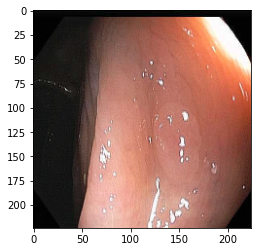

In [69]:
plt.imshow(im_list_new[0])

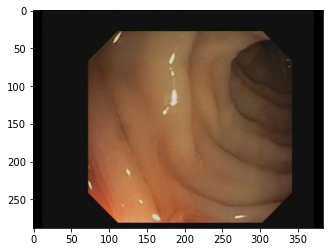

In [37]:
plt.imshow(X[3])

In [41]:
Y[3]

'adenomatous'

In [78]:
X_train,X_test,y_train,y_test=train_test_split(im_list_new,a_list_new,test_size=0.1,random_state=42)

In [79]:
print(X_train[1].shape)

(224, 224, 3)


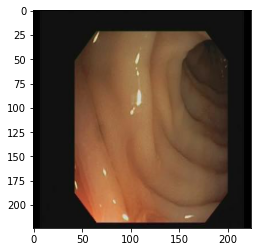

In [124]:
plt.imshow(X_train[0])

In [80]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3, 224, 224, 3)
(3,)
(1, 224, 224, 3)
(1,)


In [100]:
model = Sequential()
model.add(Dense(5,activation='relu',input_shape=(224,224,3)))
model.add(Dense(3,activation ='sigmoid'))

In [101]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 224, 224, 5)       20        
_________________________________________________________________
dense_22 (Dense)             (None, 224, 224, 3)       18        
Total params: 38
Trainable params: 38
Non-trainable params: 0
_________________________________________________________________


In [102]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [120]:
model.fit(X_train,y_train,epochs=2,verbose=True)
#ValueError: Error when checking target: expected dense_13 to have 4 dimensions, but got array with shape (3, 1)

ValueError: Error when checking target: expected dense_22 to have 4 dimensions, but got array with shape (3, 1)

### CNN

In [104]:
len_classes=3
dropout_rate=0.2
cnn_model = Sequential()
cnn_model.add(Lambda(lambda img: (img/255.0)-0.5, input_shape=(None, None, 3)))
cnn_model.add(Conv2D(filters=64, kernel_size=3, strides=1))
cnn_model.add(Dropout(dropout_rate))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation("relu"))
cnn_model.add(Conv2D(filters=64, kernel_size=3, strides=1))
cnn_model.add(Dropout(dropout_rate))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation("relu"))
cnn_model.add(Conv2D(filters=len_classes, kernel_size=1, strides=1))
cnn_model.add(Dropout(dropout_rate))
cnn_model.add(BatchNormalization())
cnn_model.add(GlobalMaxPooling2D())
cnn_model.add(Activation("softmax"))

In [107]:
cnn_model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_2 (Lambda)            (None, None, None, 3)     0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, None, None, 64)    1792      
_________________________________________________________________
dropout_4 (Dropout)          (None, None, None, 64)    0         
_________________________________________________________________
batch_normalization_4 (Batch (None, None, None, 64)    256       
_________________________________________________________________
activation_4 (Activation)    (None, None, None, 64)    0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, None, None, 64)    36928     
_________________________________________________________________
dropout_5 (Dropout)          (None, None, None, 64)  

In [105]:
cnn_model.compile(loss="categorical_crossentropy", 
              optimizer="adam", metrics=["accuracy"])

In [108]:
#cnn_model.fit(im_list_new,a_list_new, epochs=2)
#ValueError: Error when checking target: expected activation_3 to have shape (3,) but got array with shape (1,)